In [2]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import BasicAer
from qiskit import execute
from qiskit.tools.visualization import plot_histogram
from IBMQuantumExperience.IBMQuantumExperience import IBMQuantumExperience
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
import math

{'0010': 1024}


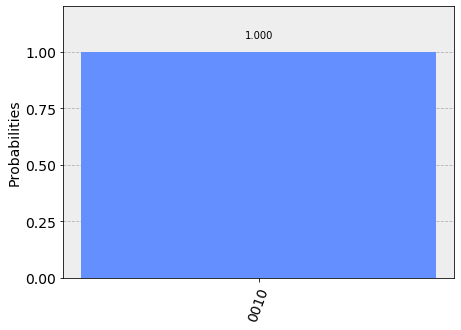

In [19]:
def qft(qc,qr,n):
    for i in range(n):
        for j in range(i):
            qc.cu1(math.pi/float(2**(i-j)), qr[i], qr[j])
        qc.h(qr[i])


def iqft(qc, qr, n):
    for i in range(n):
        for j in range(i):
            qc.cu1(-math.pi/float(2**(i-j)), qr[j], qr[i])
        qc.h(qr[i])
        
qx = QuantumRegister(4)
qy = QuantumRegister(1)
c = ClassicalRegister(4, "c")
qc = QuantumCircuit(qx, qy, c, name="qft_4q")

#qc.h(qx)
qc.x(qx[1])

#qc.x(qy)
#qc.h(qy)

# oracle
#qc.cx(qx[0],qy)
#qc.cx(qx[1],qy)
#qc.cx(qx[2],qy)
#qc.cx(qx[3],qy)

#qc.h(qx)
#qc.h(qy)

#------ QFT
iqft(qc,qx,4)
qc.swap(qx[0], qx[3])
qc.swap(qx[1], qx[2])

qft(qc,qx,4)
qc.swap(qx[0], qx[3])
qc.swap(qx[1], qx[2])

qc.measure(qx, c)

backend = BasicAer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts  = result.get_counts(qc)
print(counts)
plot_histogram(counts)

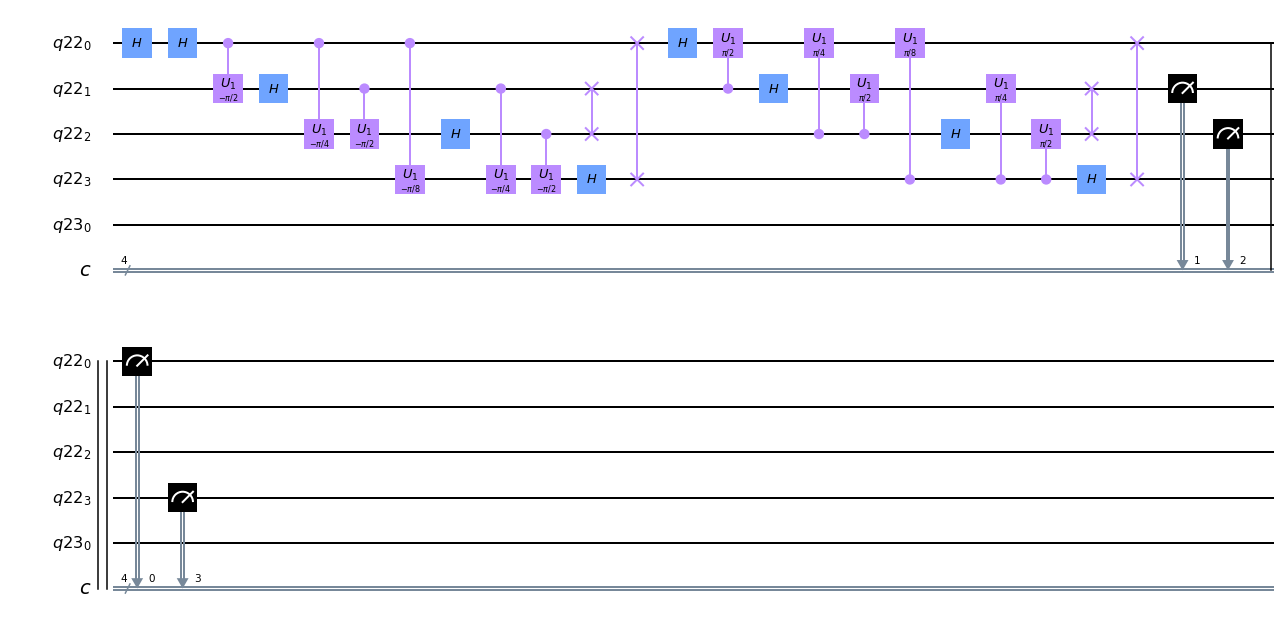

In [15]:
qc.draw(output='mpl', plot_barriers=False)

In [ ]:
token = open("../ibm_token.txt","r").read().strip()
IBMQ.enable_account(token)

In [ ]:
shots = 1024

provider = IBMQ.get_provider()
print(provider.backends())
backend  = provider.get_backend('ibmq_belem')

job = execute(qc, backend=backend, shots=shots)
job_monitor(job)

In [ ]:
result = job.result()
print(result)

In [ ]:
counts_exp = result.get_counts(qc)
plot_histogram([counts_exp,counts])

In [ ]:
jobID = job.job_id()
print('JOB ID: {}'.format(jobID))

In [14]:
print(qc.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q10[4];
qreg q11[1];
creg c[4];
h q10[0];
cu1(1.57079632679490) q10[1],q10[0];
h q10[1];
cu1(0.785398163397448) q10[2],q10[0];
cu1(1.57079632679490) q10[2],q10[1];
h q10[2];
cu1(0.392699081698724) q10[3],q10[0];
cu1(0.785398163397448) q10[3],q10[1];
cu1(1.57079632679490) q10[3],q10[2];
h q10[3];
swap q10[0],q10[3];
swap q10[1],q10[2];
barrier q10[0],q10[1],q10[2],q10[3],q11[0];
measure q10[0] -> c[0];
measure q10[1] -> c[1];
measure q10[2] -> c[2];
measure q10[3] -> c[3];

